#  Python Implementation: Predicting the 2008 Financial Crisis with LSTM
- Ertiza Abbas - Model written on 10th of November 2024

Epoch 1/50
5/5 [==============================] - 2s 3ms/step - loss: 0.6990 - accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.7778
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.8889
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.7778
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6667
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6667
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6667
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6667
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6667
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.6667
Epoch 11/50
5/5 [======================

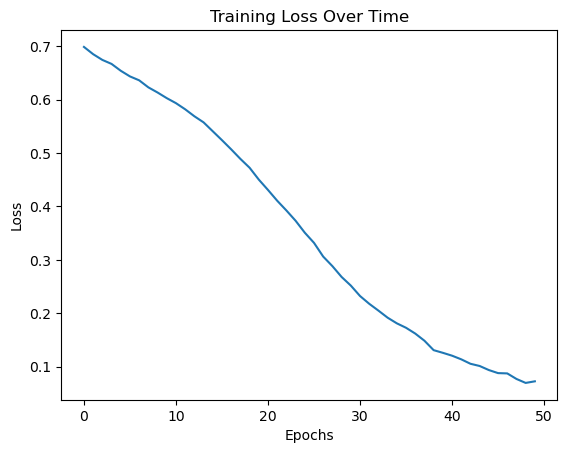

1/1 [==============================] - 0s 414ms/step
Predicted Probability of Crisis: 0.9999


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Simulated dataset (for educational purposes)
data = {
    'GDP Growth': [3.5, 3.2, 2.8, 2.4, 1.9, 1.5, 1.0, -0.5, -2.0, -3.5, -4.2, -5.0],  # GDP decline before crisis
    'Unemployment Rate': [4.5, 4.7, 4.8, 5.0, 5.3, 5.7, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0],  # Unemployment rising
    'Interest Rate': [5.0, 4.8, 4.5, 4.2, 3.8, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5],  # Fed cutting rates
    'Stock Volatility (VIX)': [15, 16, 18, 20, 22, 25, 30, 35, 40, 50, 60, 70],  # VIX rising → market fear
    'Crisis': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # Crisis starts mid-2007
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Normalize features
scaler = MinMaxScaler()
features = df[['GDP Growth', 'Unemployment Rate', 'Interest Rate', 'Stock Volatility (VIX)']]
scaled_features = scaler.fit_transform(features)

# Prepare input sequences (each sequence is past 3 months of data)
X, y = [], []
sequence_length = 3
for i in range(len(df) - sequence_length):
    X.append(scaled_features[i:i+sequence_length])  # Past 3 months as input
    y.append(df['Crisis'].iloc[i+sequence_length])  # Crisis label for next month

X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=False, input_shape=(sequence_length, 4)),
    Dense(1, activation='sigmoid')  # Binary classification: Crisis (1) or No Crisis (0)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X, y, epochs=50, batch_size=2, verbose=1)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Predict next month’s probability of crisis
latest_data = np.expand_dims(scaled_features[-sequence_length:], axis=0)  # Last 3 months
crisis_probability = model.predict(latest_data)
print(f"Predicted Probability of Crisis: {crisis_probability[0][0]:.4f}")
